<a href="https://colab.research.google.com/github/redom13/ML/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Data Collection and Preprocessing

In [3]:
car_dataset=pd.read_csv('/content/car data.csv')

In [3]:
car_dataset.head(n=10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [4]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_dataset.isnull().sum() # To see if there are any missing values

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [6]:
# Checking distribution of categorical data
car_dataset['Fuel_Type'].value_counts(), car_dataset['Seller_Type'].value_counts(), car_dataset['Transmission'].value_counts()

(Fuel_Type
 Petrol    239
 Diesel     60
 CNG         2
 Name: count, dtype: int64,
 Seller_Type
 Dealer        195
 Individual    106
 Name: count, dtype: int64,
 Transmission
 Manual       261
 Automatic     40
 Name: count, dtype: int64)

In [7]:
car_dataset['Car_Name'].value_counts()

,count
Car_Name,
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
...,...
Honda CB Trigger,1
Yamaha FZ S,1
Bajaj Pulsar 135 LS,1


# Encoding the Categorical Data

In [8]:
# Getting the categorical columns
categorical_col=[cname for cname in car_dataset.columns if car_dataset[cname].nunique()<10 and car_dataset[cname].dtype=='object']
categorical_col

['Fuel_Type', 'Seller_Type', 'Transmission']

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in categorical_col:
  car_dataset[col]=le.fit_transform(car_dataset[col])

In [10]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


# Splitting the data and target

In [15]:
y=car_dataset['Selling_Price']
X=car_dataset.drop(columns=['Selling_Price','Car_Name'],axis=1)

In [16]:
X,y

(     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
 0    2014           5.59       27000          2            0             1   
 1    2013           9.54       43000          1            0             1   
 2    2017           9.85        6900          2            0             1   
 3    2011           4.15        5200          2            0             1   
 4    2014           6.87       42450          1            0             1   
 ..    ...            ...         ...        ...          ...           ...   
 296  2016          11.60       33988          1            0             1   
 297  2015           5.90       60000          2            0             1   
 298  2009          11.00       87934          2            0             1   
 299  2017          12.50        9000          1            0             1   
 300  2016           5.90        5464          2            0             1   
 
      Owner  
 0        0  
 1        0  
 2      

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((270, 7), (31, 7), (270,), (31,))

# Model Training and evaluation

In [24]:
from sklearn.model_selection import cross_val_score

In [50]:
CV=[]
R2_train=[]
R2_test=[]
def car_pred_model(model,model_name):
  # Training model
  model.fit(X_train,y_train)

  # R2 score of train set
  y_pred_train=model.predict(X_train)
  r2_train=metrics.r2_score(y_train,y_pred_train)
  R2_train.append(round(r2_train,2))

  # R2 score of test set
  y_pred_test=model.predict(X_test)
  r2_test=metrics.r2_score(y_test,y_pred_test)
  R2_test.append(round(r2_test,2))

  # R2 mean of train set using cross validation
  cross_val=cross_val_score(model,X_train,y_train,cv=5)
  cross_mean=cross_val.mean()
  CV.append(round(cross_mean,2))

  # Printing results
  print("Train R2-score :",round(r2_train,2))
  print("Test R2-score :",round(r2_test,2))
  print("Train CV scores :",cross_val)
  print("Train CV mean :",round(cross_mean,2))

  # Plotting Graphs
  # Residual Plot of train data
  fig, ax = plt.subplots(1,2,figsize = (10,4))
  ax[0].set_title('Residual Plot of Train samples')
  sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
  ax[0].set_xlabel('y_train - y_pred_train')

  # Y_test vs Y_train scatter plot
  ax[1].set_title('y_test vs y_pred_test')
  ax[1].scatter(x = y_test, y = y_pred_test)
  ax[1].set_xlabel('y_test')
  ax[1].set_ylabel('y_pred_test')

  plt.show()

*1.Linear Regression*

Train R2-score : 0.88
Test R2-score : 0.84
Train CV scores : [0.82861818 0.83745041 0.78515695 0.84743361 0.855693  ]
Train CV mean : 0.83


<ipython-input-50-e1d2e80c670e>:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])


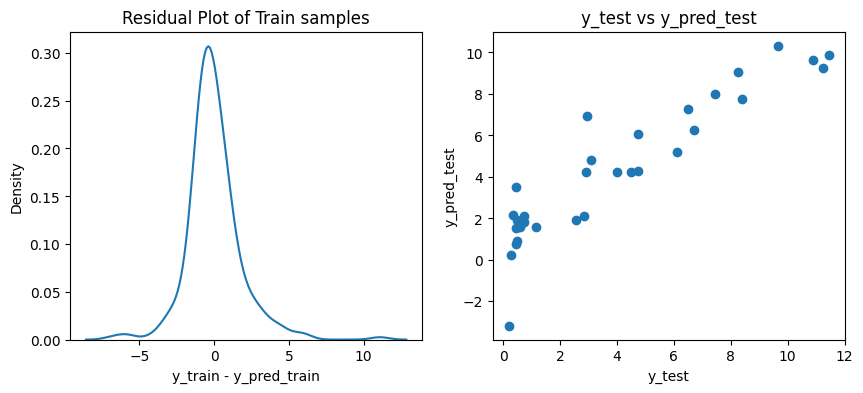

In [51]:
lr=LinearRegression()
car_pred_model(lr,'Linear_Regressor.pk1')

In [41]:
from sklearn.model_selection import RandomizedSearchCV

*2.Lasso*

Train R2-score : 0.88
Test R2-score : 0.84
Train CV scores : [0.82944772 0.83967386 0.78545843 0.80438563 0.85543876]
Train CV mean : 0.82


<ipython-input-50-e1d2e80c670e>:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])


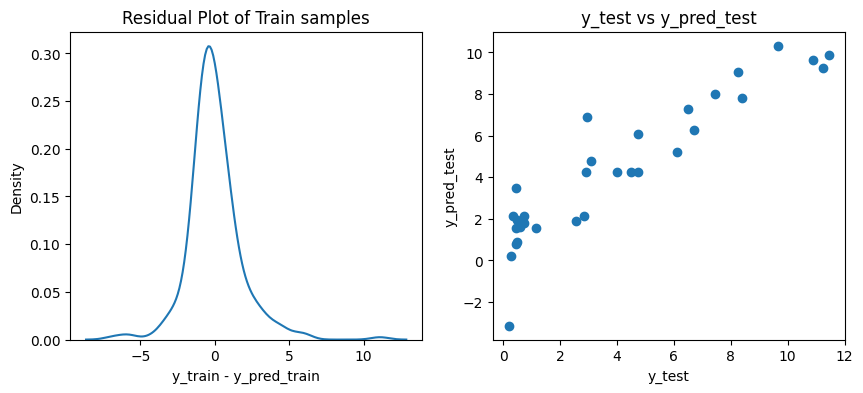

In [52]:
ls=Lasso()
alpha=np.logspace(-3,3,num=14) # Range for alpha--> from 10^-3 to 10^3,14 values in total
ls_rs=RandomizedSearchCV(ls,param_distributions=dict(alpha=alpha))
car_pred_model(ls_rs,'Lasso_Regressor.pk1')

*3. Gradient Boosting*

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
gb=GradientBoostingRegressor()

learning_rate=[0.001,0.01,0.1,0.2]
# No of trees
n_estimators=list(range(500,1000,100))
# Max no of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameter dictionary
param_grid={
    "learning_rate":learning_rate,
    "n_estimators":n_estimators,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
    "max_features":max_features
}

gb_rs=RandomizedSearchCV(estimator = gb,param_distributions = param_grid)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Train R2-score : 1.0
Test R2-score : 0.96
Train CV scores : [0.82422553 0.88742888 0.96109654 0.77015946 0.97873709]
Train CV mean : 0.88


<ipython-input-50-e1d2e80c670e>:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])


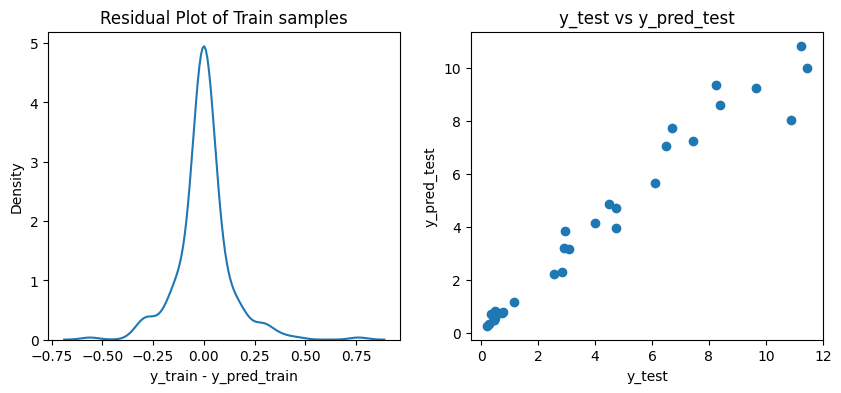

In [53]:
car_pred_model(gb_rs,'Gradient_Boosting_Regressor.pk1')

# Comparision between the models

In [54]:
R2_train

[0.88, 0.88, 1.0]

In [55]:
Technique = ["LinearRegression","Lasso","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.84,0.83
1,Lasso,0.88,0.84,0.82
2,GradientBoostingRegressor,1.00,0.96,0.88
